In [10]:
#Create 2D points forming clusters and is easily separable by linear boundary 
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=3.0, random_state=42)

In [11]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

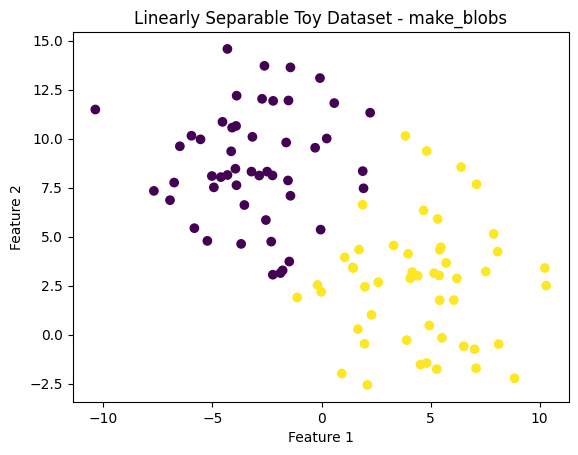

In [12]:
#Plotting all the data points to visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Linearly Separable Toy Dataset - make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [22]:
#Using SVM for C value of 1 and 1000
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=0.01)
model2 = SVC(kernel='linear', C=100)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [23]:
#Predicting the test set results
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

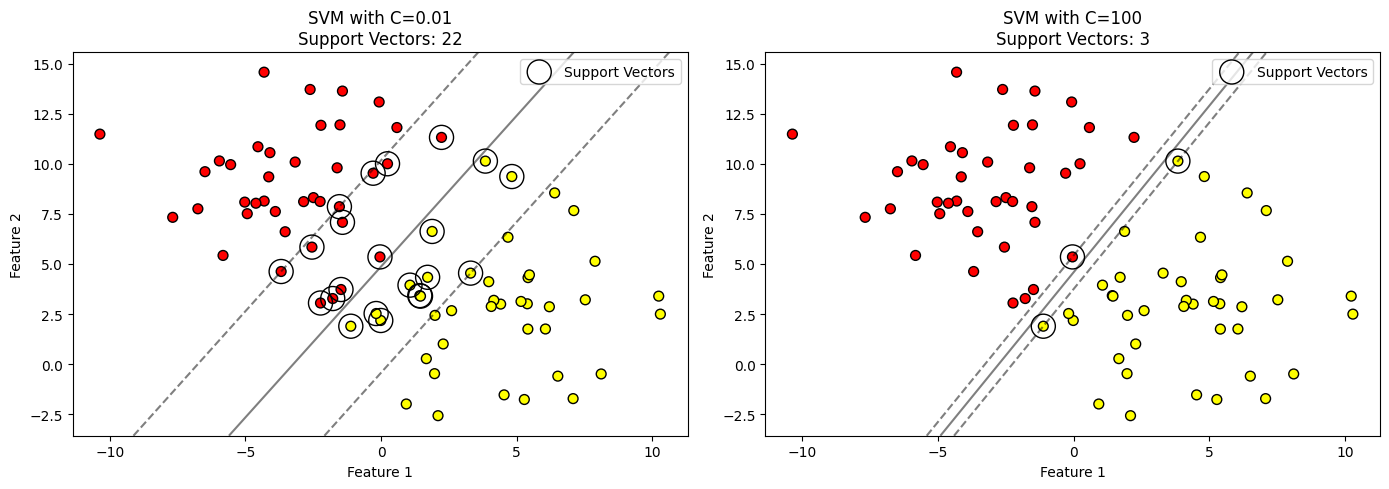

In [24]:
def plot_svc_decision_function(model, ax, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',
                   edgecolors='k', label='Support Vectors')

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Model 1 (C=0.01)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn', edgecolors='k')
axes[0].set_xlim(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1)
axes[0].set_ylim(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1)
plot_svc_decision_function(model1, axes[0])
axes[0].set_title(f'SVM with C=0.01\nSupport Vectors: {len(model1.support_vectors_)}', fontsize=12)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# Plot Model 2 (C=100)
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn', edgecolors='k')
axes[1].set_xlim(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1)
axes[1].set_ylim(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1)
plot_svc_decision_function(model2, axes[1])
axes[1].set_title(f'SVM with C=100\nSupport Vectors: {len(model2.support_vectors_)}', fontsize=12)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()